# Dear humans yes emissions are required to keep me green!
Name: Waris Hooda
<br>
Mob: +91 9527617599
<br>
Email: hooda.waris0507@gmail.com
<br>
LinkedIn: https://www.linkedin.com/in/warishooda5795/
<br>

## Objective
The objective of the assignment is to highlight the changes in other environment variables due to reduced air pollution due to covid-19 lockdown. 

## Remote Sensing Indices:
* Normalised Difference Vegetation Index (NDVI)
* Enhanced Vegetation Index (EVI)
* Normalised Difference Vegetation Index (NDWI) 
* Aerosol Optical Depth (AOD)
* Land Surface Temperature (LST)
* Surface Soil Moisture (SSM)
* Evapotranspiration (ET)
* Latent Heat Flux (LHF)
* Night Time Lights (NTL)
* Precipitation 
* PM 2.5
* PM 10 
* Air Quality Index (AQI)
* CO, NO, NO2, NH3, SO2, O3...


## Load libraries

In [3]:
#import libraries
import ee   #google earth engine library
import folium  #map visualisation
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

import glob
import os
import pandas as pd   
import time
from re import search
from functools import reduce

from csv import writer

import seaborn as sn
import math

## Authenticate the Google Earth Engine (GEE) login
To verify, copy the token created after logging in with Google, paste it into the textbox below, and press the enter key. 

In [21]:
ee.Authenticate()

Enter verification code: 4/1AX4XfWh8SxpH4eCNHdisTEIvs9dbm82HxID3v0lnkP0vaCi6Hxus1ncsv6s

Successfully saved authorization token.


## Initialise Google earth engine

In [22]:
ee.Initialize()

## Site details

Please fill the necessary information.

Note:
Single pixel data are used in the case study.
The user can provide polygon geomtery, however GEE can only compute 100000 pixels in total.
User can take a very large area or a small region for a longer amount of time.

In [23]:
#Site description
sitename = 'Agriculture'

#Point centre
lat = 29.175980
long = 76.509499


# Initial data collection date (inclusive).
i_date = '2019-01-01'

# Final data collection date (exclusive).
f_date = '2022-01-01'

date = pd.date_range(start = i_date, end = f_date)


## Site details

Point buffer range (User can add geometer or shape file here)

In [49]:
# identify a 500 meter buffer around our Point Of Interest (POI)
poi = ee.Geometry.Point(long, lat).buffer(30000)

## Collecting time series NDVI data 

In [50]:
def ndvi_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi).get('NDVI')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_ndvi_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'NDVI'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for NDVI.
        ndvi = ee.ImageCollection("MODIS/MOD09GA_006_NDVI").filterDate(date[i],date[i+1])
        
        ndvi_reduced_imgs = ndvi.map(ndvi_mean)
        nested_list = ndvi_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'NDVI'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        #df['date'] = pd.to_datetime(df['date'])
        #df = df.set_index('date')
        #df
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/NDVI/'+sitename+'_NDVI.csv', index=False)

## Collecting time series EVI data 

In [51]:
def evi_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('EVI')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_evi_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'EVI'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for EVI.
        evi = ee.ImageCollection("MODIS/MOD09GA_006_EVI").filterDate(date[i],date[i+1])
        
        evi_reduced_imgs = evi.map(evi_mean)
        nested_list = evi_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'EVI'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        #df['date'] = pd.to_datetime(df['date'])
        #df = df.set_index('date')
        #df
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/EVI/'+sitename+'_EVI.csv', index=False)

## Collecting time series NDWI data 

In [52]:
def ndwi_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('NDWI')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_ndwi_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'NDWI'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for NDWI.
        ndwi = ee.ImageCollection("MODIS/MOD09GA_006_NDWI").filterDate(date[i],date[i+1])
        
        ndwi_reduced_imgs = ndwi.map(ndwi_mean)
        nested_list = ndwi_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'NDWI'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/NDWI/'+sitename+'_NDWI.csv', index=False)

## Collecting time series LST day time data of Terra

In [53]:
def lst_day_terra_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('LST_Day_1km')
    return img.set('date', img.date().format()).set('mean',mean).toFloat()

def t_modis_to_celsius(t_modis):
    """Converts MODIS LST units to degrees Celsius."""
    t_celsius =  0.02*t_modis - 273.15
    return t_celsius


def coll_lst_day_terra_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'LST Day Terra'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for LST.
        lst_day_terra = ee.ImageCollection("MODIS/006/MOD11A1").filterDate(date[i],date[i+1])
        
        lst_day_terra_reduced_imgs = lst_day_terra.map(lst_day_terra_mean)
        nested_list = lst_day_terra_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'LST Day Terra'])
        
        # Apply the function to get temperature in celsius.
        df_temp['LST Day Terra'] = df_temp['LST Day Terra'].apply(t_modis_to_celsius)
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/LST_Day_Terra/'+sitename+'_LST_Day_Terra.csv', index=False)

## Collecting time series LST night time data of Terra

In [54]:
def lst_night_terra_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('LST_Night_1km')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_lst_night_terra_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'LST Night Terra'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for LST.
        lst_night_terra = ee.ImageCollection("MODIS/006/MOD11A1").filterDate(date[i],date[i+1])
        
        lst_night_terra_reduced_imgs = lst_night_terra.map(lst_night_terra_mean)
        nested_list = lst_night_terra_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'LST Night Terra'])
        
        # Apply the function to get temperature in celsius.
        df_temp['LST Night Terra'] = df_temp['LST Night Terra'].apply(t_modis_to_celsius)
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/LST_Night_Terra/'+sitename+'_LST_Night_Terra.csv', index=False)

## Collecting time series LST day time data of Aqua

In [55]:
def lst_day_aqua_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('LST_Day_1km')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_lst_day_aqua_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'LST Day Aqua'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for LST.
        lst_day_aqua = ee.ImageCollection("MODIS/006/MYD11A1").filterDate(date[i],date[i+1])
        
        lst_day_aqua_reduced_imgs = lst_day_aqua.map(lst_day_aqua_mean)
        nested_list = lst_day_aqua_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'LST Day Aqua'])
        
        # Apply the function to get temperature in celsius.
        df_temp['LST Day Aqua'] = df_temp['LST Day Aqua'].apply(t_modis_to_celsius)
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/LST_Day_Aqua/'+sitename+'_LST_Day_Aqua.csv', index=False)

## Collecting time series LST night time data of Aqua

In [56]:
def lst_night_aqua_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('LST_Night_1km')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_lst_night_aqua_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'LST Night Aqua'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for LST.
        lst_night_aqua = ee.ImageCollection("MODIS/006/MYD11A1").filterDate(date[i],date[i+1])
        
        lst_night_aqua_reduced_imgs = lst_night_aqua.map(lst_night_aqua_mean)
        nested_list = lst_night_aqua_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'LST Night Aqua'])
        
        
        # Apply the function to get temperature in celsius.
        df_temp['LST Night Aqua'] = df_temp['LST Night Aqua'].apply(t_modis_to_celsius)
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/LST_Night_Aqua/'+sitename+'_LST_Night_Aqua.csv', index=False)

## Collecting time series AOD data

In [57]:
def aod_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('Optical_Depth_055')
    return img.set('date', img.date().format()).set('mean',mean)

def getQABits(image, start, end, newName):
    # Compute the bits we need to extract.
    pattern = 0;
    for i in range (start,end):
        pattern += math.pow(2, i)
    
    # Return a single band image of the extracted QA bits, giving the banda new name.
    return image.select([0], [newName]).bitwiseAnd(pattern).rightShift(start);

def maskQuality(image):
    # Select the QA band.
    QA = image.select('AOD_QA')
    # Get the internal_cloud_algorithm_flag bit.
    internalQuality = getQABits(QA,8, 11, 'internal_quality_flag')
    # Return an image masking out cloudy areas.
    return image.updateMask(internalQuality.eq(0))

def coll_aod_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'AOD'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for AOD.
        aod = ee.ImageCollection("MODIS/006/MCD19A2_GRANULES").filterDate(date[i],date[i+1]).map(maskQuality)
        
        aod_reduced_imgs = aod.map(aod_mean)
        nested_list = aod_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'AOD'])

        #df_temp.groupby('{:%d}'.format).mean()
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        
        df_date = df_temp["date"].map(lambda t: t.date()).unique()
        df_temp = df_temp.groupby(pd.Grouper(freq='D', key='date')).mean()
        
        df_temp['date'] = df_date
        print(df_temp)
        df = df.append(df_temp)
        
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/AOD/'+sitename+'_AOD.csv', index=False)

## Collecting time series NTL data

In [58]:
def ntl_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('avg_rad')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_ntl_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'NTL'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for NTL.
        ntl = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(date[i],date[i+1])
        
        ntl_reduced_imgs = ntl.map(ntl_mean)
        nested_list = ntl_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'NTL'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/NTL/'+sitename+'_NTL.csv', index=False)


## Collecting time series SSM data

In [59]:
def ssm_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('ssm')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_ssm_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'SSM'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Selection of appropriate bands and dates for SSM.
        ssm = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture").filterDate(date[i],date[i+1])
        
        ssm_reduced_imgs = ssm.map(ssm_mean)
        nested_list = ssm_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'SSM'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/SSM/'+sitename+'_SSM.csv', index=False)



## Collecting time series PPT data

In [60]:
def ppt_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('precipitation')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_ppt_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'Precipitation'])

    for i in range (0,len(date)):
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Import the MODIS Normalized PPT.
        # Selection of appropriate bands and dates for PPT.
        ppt = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY").filterDate(date[i],date[i+1])
        
        ppt_reduced_imgs = ppt.map(ppt_mean)
        nested_list = ppt_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'Precipitation'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/PPT/'+sitename+'_PPT.csv', index=False)




## Collecting time series Evapotranspiration data

In [61]:
def et_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=463.3).get('ET')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_et_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'Evapotranspiration'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Import the MODIS Normalized ET.
        # Selection of appropriate bands and dates for ET.
        et = ee.ImageCollection("MODIS/006/MOD16A2").filterDate(date[i],date[i+1])
        
        et_reduced_imgs = et.map(et_mean)
        nested_list = et_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'Evapotranspiration'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/Evapotranspiration/'+sitename+'_EVT.csv', index=False)

## Collecting time series Latent Heat Energy data

In [62]:
def lhe_mean(img):
    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi).get('LE')
    return img.set('date', img.date().format()).set('mean',mean)

def coll_lhe_data():
    count = len(date)
    print(count)
    date_data = []
    
    df = pd.DataFrame(columns = ['date', 'Latent Heat Flux'])

    for i in range (0,len(date)):
        # Import the MODIS Normalized Difference Vegetation Index collection.
        #print(date[i])
        if (i+1) == count:
            continue
        
        # Import the MODIS Normalized LHE.
        # Selection of appropriate bands and dates for LHE.
        lhe = ee.ImageCollection("MODIS/006/MOD16A2").filterDate(date[i],date[i+1])
        
        lhe_reduced_imgs = lhe.map(lhe_mean)
        nested_list = lhe_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
        # dont forget we need to call the callback method "getInfo" to retrieve the data
        df_temp = pd.DataFrame(nested_list.getInfo(), columns=['date', 'Latent Heat Flux'])
        
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        #df_temp = df_temp.set_index('date')
        print(df_temp)
        
        df = df.append(df_temp)
        
    df.to_csv(r'/Users/waris0507/Desktop/BSA/Latent_Heat_Flux/'+sitename+'_Latent_Heat_Flux.csv', index=False)

## Collecting time series NDCI data

In [ ]:
# def maskS2clouds(image):
#     qa = image.select('QA60');

# # Bits 10 and 11 are clouds and cirrus, respectively.
#     cloudBitMask = 1 << 10;
#     cirrusBitMask = 1 << 11;

# # Both flags should be set to zero, indicating clear conditions.
#     mask = qa.bitwiseAnd(cloudBitMask).eq(0)and(qa.bitwiseAnd(cirrusBitMask).eq(0))
#     return image.updateMask(mask).divide(10000)

ndci = ee.ImageCollection('COPERNICUS/S2_SR').filterDate(i_date,f_date)
#ndci = ee.Image("COPERNICUS/S2_SR").filter(ee.Filter.date(i_date,f_date))

#.filterDate(i_date,f_date) #.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).map(maskS2clouds)
#.filterBounds(poi).sort('CLOUDY_PIXEL_PERCENTAGE',true).first().clip(poi)

# def addNDCI(img):# add NDVI band to collection
#     #return image.addBands(image.normalizedDifference([ 'B5','B4',]).rename('NDCI'))
#     return img.addBands(img.expression('NDCI = (B5 - B5) / (B5 + B4)', {'B5': img.select('B5'),'B4': img.select('B4')}))


# #ndci = ee.ImageCollection("COPERNICUS/S2")
# #imageBand_NDCIBand = ndci.map(addNDCI)
# #image_XT = ee.Image(imageBand_NDCIBand.filterDate('2019-10-28','2020-03-30').filterMetadata('MGRS_TILE','equals','36RXT').first())
# #image_XT.select('NDCI').getInfo()


# def ndci_mean(img):
#     mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=5000).get('NDCI')
#     return img.set('date', img.date().format()).set('mean',mean)

# imageBand_NDCIBand = ndci.map(addNDCI)
# ndci_reduced_imgs = imageBand_NDCIBand.map(ndci_mean)
# #ndci_reduced_imgs = ndci.map(ndci_mean)
# nested_list = ndci_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
# # dont forget we need to call the callback method "getInfo" to retrieve the data
# df = pd.DataFrame(nested_list.getInfo(), columns=['date','mean NDCI'])
# df['date'] = pd.to_datetime(df['date'])
# df = df.set_index('date')
# df



## Collecting time series Solar Radiation data

In [57]:
#ee.Algorithm.EEFlux.DailyETr(Tair, SPH, Rs, WindSpeed, Elevation, Zw, doy, hour, ReferenceSurface)

## Change in parameters and correlation plots 

In [9]:
def show_change(delhi_data, sitename):
    
    # Create list of headers from the dataframe headers.
    e_var = list(delhi_data.columns.values)
    
    #select data during the same time period last year 
    delhi_data_lastyear=delhi_data[delhi_data['date']>='2019-03-25']
    delhi_data_lastyear=delhi_data_lastyear[delhi_data_lastyear['date']<'2019-06-30']
    delhi_data_lastyear
    delhi_data_lastyear_mean = delhi_data_lastyear[e_var].mean()
    print(delhi_data_lastyear_mean)

    #select data during Covid-19
    delhi_data_lockdown=delhi_data[delhi_data['date']>='2020-03-25']
    delhi_data_lockdown=delhi_data_lockdown[delhi_data_lockdown['date']<'2020-06-30']
    delhi_data_lockdown_mean = delhi_data_lockdown[e_var].mean()
    print(delhi_data_lockdown_mean)

    #removed date from the list
    e_var = e_var[1:]
    x_axis = np.arange(len(e_var))
    
    #figure size
    plt.figure(figsize=(12, 8), dpi=300)
    
    # Multi bar Chart
    plt.bar(x_axis -0.2, delhi_data_lastyear_mean, width=0.4, label = '2019')
    plt.bar(x_axis +0.2, delhi_data_lockdown_mean, width=0.4, label = '2020')
    plt.xticks(rotation = 45)
    plt.title('Comparision at ' + sitename)
    
    # Xticks
    plt.xticks(x_axis, e_var)

    # Add legend
    plt.legend()

    # Display
    plt.show()

    per_dec_list = []

    #cacluation for percentage 2019/2020
    for i in range(0,len(e_var)):
        per_dec = (delhi_data_lockdown_mean[i]-delhi_data_lastyear_mean[i])/delhi_data_lockdown_mean[i]
        per_dec_list.append(per_dec*100)

    #figure size and title
    plt.figure(figsize=(12, 8), dpi=300)
    plt.bar(e_var, per_dec_list, label = 'Percentage Change')
    plt.xticks(rotation = 45)
    plt.title('Percentage Change at ' + sitename)
    plt.show()



In [50]:
def show_plots():

    #sitename = 'Forest'

    delhi_data = pd.read_csv('/Users/waris0507/Desktop/BSA/NDVI/'+sitename+'_NDVI.csv')
    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/EVI/'+sitename+'_EVI.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/NDWI/'+sitename+'_NDWI.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/LST_Day_Terra/'+sitename+'_LST_Day_Terra.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/LST_Night_Terra/'+sitename+'_LST_Night_Terra.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/LST_Night_Aqua/'+sitename+'_LST_Night_Aqua.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/LST_Day_Aqua/'+sitename+'_LST_Day_Aqua.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/NTL/'+sitename+'_NTL.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/AOD/'+sitename+'_AOD.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    #delhi_data.dtypes
    
    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/SSM/'+sitename+'_SSM.csv')
    #trim time from date (yyyy-mm-dd hh:mm:ss to yyyy-mm-dd)
    #df_temp['date'] = pd.to_datetime(df_temp['date'])
    df_temp['date'] = pd.to_datetime(df_temp['date']).dt.date
    #df_temp['date'] = df_temp['date'].astype('datetime64[ns]')
    df_temp['date']=df_temp['date'].astype(str)

    #df_temp

    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/PPT/'+sitename+'_PPT.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/Evapotranspiration/'+sitename+'_EVT.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    df_temp = pd.read_csv('/Users/waris0507/Desktop/BSA/Latent_Heat_Flux/'+sitename+'_Latent_Heat_Flux.csv')
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_temp, on='date', how='outer')

    #ground station data air pollution
    city_day_data = pd.read_csv('/Users/waris0507/Desktop/BSA/Air_Quality_Data/city_day_1.csv')
    city_day_data=city_day_data.groupby('City').get_group(sitename)
    
    #selecting data from 2019-2021 only
    df_year_19_20=city_day_data[city_day_data['date']>='2019']
    
    #Align two different time series with missing data into single dataframe (SQL concept of primary key)
    delhi_data = pd.merge(delhi_data, df_year_19_20, on='date', how='outer')


    #delhi_data.drop(['AQI_Bucket'], axis = 1, inplace= True)


    # Remove three columns as index base
    delhi_data.drop(columns =['City', 'AQI_Bucket'], inplace= True)

    #convert the column type into datetime format
    delhi_data['date'] = delhi_data['date'].astype('datetime64[ns]')

    # sort merged time series dataframe
    delhi_data = delhi_data.sort_values(by = 'date', ascending=True)
    #df.to_csv('final_dataset.csv')
    #print(delhi_data)



    #timeperiod name
    timeperiod = '2019-20'
    #sitename = 'Forest'

    #call for function to calulate changes between 2019 and 2020
    show_change(delhi_data, sitename)

    #date range selection for baseline
    delhi_data=delhi_data[delhi_data['date']>='2019-03-25']
    delhi_data=delhi_data[delhi_data['date']<'2019-06-30']

    f = plt.figure(figsize=(19, 15))
    
    #calulate correlation bettween the variables
    corrMatrix = delhi_data.corr()
    print (corrMatrix)
    # sn.heatmap(corrMatrix, annot=True, fignum=f.number)
    
    #correltion plot
    hmap = sn.heatmap(corrMatrix, xticklabels=corrMatrix.columns.values, yticklabels=corrMatrix.columns.values, annot=True)
    hmap.set_title('Correlation Heatmap ' + sitename + ' ' + timeperiod, fontdict={'fontsize':12}, pad=12)

    #save the figure
    plt.savefig('/Users/waris0507/Desktop/BSA/'+ sitename +'_Heatmap_' + timeperiod + '.jpg')
    plt.show()

    delhi_data_date = pd.DataFrame()
    delhi_data_date = delhi_data['date']
    delhi_data_temp = delhi_data
    # Remove three columns as index base
    delhi_data_temp.drop(columns =['date'], inplace= True)
    #print(delhi_data_temp)
    
    #Normalizind data for comparision to see major contributor during the event.
    normalized_df=(delhi_data-delhi_data.mean())/delhi_data.std()
    normalized_data_df = [delhi_data_date, normalized_df]
    normalized_data_df = pd.concat(normalized_data_df, axis=1)

    e_var = list(normalized_data_df.columns.values)
    e_var = e_var[1:]
    print(e_var)


    #figure size
    plt.figure(figsize=(25, 15))
    
    normalized_data_df.plot(x="date", y=e_var, kind="line", rot=0, figsize=(25, 15)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.savefig('/Users/waris0507/Desktop/BSA/'+sitename+'_timeseries.jpg')

    normalized_data_df.plot(x="date", y=e_var, kind="line", subplots=True, rot=0, figsize=(15, 10)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    #ax.legend(bbox_to_anchor=(3.5, 1.05),fancybox=True, shadow=True, ncol=5)

    #normalized_data_df = pd.concat(delhi_data_date, normalized_df) #, axis=1, join="inner")

    #normalized_data_df.to_csv(r'/Users/waris0507/Desktop/BSA/'+sitename+'_normalized_data_df.csv', index=False)

    #save the dataframe in csv
    delhi_data.to_csv(r'/Users/waris0507/Desktop/BSA/'+sitename+'_Full_data_'+ timeperiod +'.csv', index=False)


## Google Earth Engine map creation

In [27]:
def add_ee_layer(self, ee_image_object, vis_params, name):
    """Adds a method for displaying Earth Engine image tiles to folium map."""
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add Earth Engine drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [28]:
def get_gee_map_data():
    # Import the MODIS land cover collection.
    lc = ee.ImageCollection('MODIS/006/MCD12Q1')

    # Import the MODIS Normalized Difference Vegetation Index collection.
    ndvi = ee.ImageCollection('MODIS/MOD09GA_006_NDVI')

    # Import the MODIS Enhanced Vegetation Index collection.
    evi = ee.ImageCollection('MODIS/MOD09GA_006_EVI')

    # Import the Landsat 8 Normalized Difference Water Index collection.
    ndwi = ee.ImageCollection('MODIS/MOD09GA_006_NDWI')

    # Import the MODIS Land Surface Temperature collection.
    lst = ee.ImageCollection('MODIS/006/MOD11A1')

    # Import the VIIRS Night Light collection.
    ntl = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG')

    # Import the USGS ground elevation image.
    elv = ee.Image('USGS/SRTMGL1_003')

    # Import the Sentinel 5P Carbon Monoxide collection.
    c0 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CO')

    # Import the Sentinel 5P Methane collection.
    ch4 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4')

    # Import the Sentinel 5P Nitrogen Dioxide collection.
    no2 = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2')

    # Import the Sentinel 5P Sulphur Dioxide collection.
    so2 = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_SO2')

    # Import the MODIS Chlorophyll collection.
    chy = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI')

    # Import the SMAP Surface Soil Moisture collection.
    ssm = ee.ImageCollection('NASA_USDA/HSL/SMAP10KM_soil_moisture')

    # Import the IMERG Precipitation collection.
    ppt = ee.ImageCollection('NASA/GPM_L3/IMERG_MONTHLY_V06')

    # Import the MODIS Aerosol Optical Depth collection.
    aod = ee.ImageCollection('MODIS/006/MCD19A2_GRANULES')
    
    
    # Selection of appropriate bands and dates for LST.
    lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for NDVI.
    ndvi = ndvi.select('NDVI').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for NDWI.
    ndwi = ndwi.select('NDWI').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for EVI.
    evi = evi.select('EVI').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for NTL.
    ntl = ntl.select('avg_rad').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for Methane.
    ch4 = ch4.select('CH4_column_volume_mixing_ratio_dry_air').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for Carbon Monoxide.
    c0 = c0.select('CO_column_number_density').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for Nitrogen Dioxide.
    no2 = no2.select('NO2_column_number_density').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for Sulphur Dioxide.
    so2 = so2.select('SO2_column_number_density').filterDate(i_date, f_date)

    # # Selection of appropriate bands and dates for methane.
    # chy = chy.select(['Rrs_645', 'Rrs_555', 'Rrs_443']).filterDate(i_date, f_date)
    # # print(chy)

    # Selection of appropriate bands and dates for Surface Soil Moisture.
    ssm = ssm.select('ssm').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for Precipitation.
    ppt = ppt.select('precipitation').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for Aerosol Optical Depth.
    aod = aod.select('Optical_Depth_047').filterDate(i_date, f_date)

    # Selection of appropriate bands and dates for methane.
    #chy = chy.select('chlor_a').filterDate(i_date, f_date)
    
    
    # Select a specific band and dates for land cover.
    lc_img = lc.select('LC_Type1').filterDate(i_date).first()

    # Reduce the LST collection by mean.
    lst_img = lst.mean()
    # Adjust for scale factor.
    lst_img = lst_img.select('LST_Day_1km').multiply(0.02)
    # Convert Kelvin to Celsius.
    lst_img = lst_img.select('LST_Day_1km').add(-273.15)


    # Reduce the NDVI collection by mean.
    ndvi_img = ndvi.mean()
    # Adjust for scale factor.
    ndvi_img = ndvi_img.select('NDVI').multiply(0.0001)


    # Reduce the NDWI collection by mean.
    ndwi_img = ndwi.mean()
    # Adjust for scale factor.
    ndwi_img = ndwi_img.select('NDWI').multiply(1)

    # Reduce the EVI collection by mean.
    evi_img = evi.mean()
    # Adjust for scale factor.
    evi_img = evi_img.select('EVI').multiply(0.0001)


    # Reduce the CH4 collection by mean.
    ch4_img = ch4.mean()
    # Adjust for scale factor.
    ch4_img = ch4_img.select('CH4_column_volume_mixing_ratio_dry_air').multiply(1)

    # Reduce the CO2 collection by mean.
    c0_img = c0.mean()
    # Adjust for scale factor.
    c0_img = c0_img.select('CO_column_number_density').multiply(1)


    # Reduce the NO2 collection by mean.
    no2_img = no2.mean()
    # Adjust for scale factor.
    no2_img = no2_img.select('NO2_column_number_density').multiply(1)


    # Reduce the SO2 collection by mean.
    so2_img = so2.mean()
    # Adjust for scale factor.
    so2_img = so2_img.select('SO2_column_number_density').multiply(1)


    # Reduce the SSM collection by mean.
    ssm_img = ssm.mean()
    # Adjust for scale factor.
    ssm_img = ssm_img.select('ssm').multiply(1)

    # Reduce the PPT collection by mean.
    ppt_img = ppt.mean()
    # Adjust for scale factor.
    ppt_img = ppt_img.select('precipitation').multiply(1)


    # Reduce the AOD collection by mean.
    aod_img = aod.mean()
    # Adjust for scale factor.
    aod_img = aod_img.select('Optical_Depth_055').multiply(0.001)
    
    
    # # Set visualization parameters for ground elevation.
    # elv_vis_params = {
    #     'min': 0, 'max': 4000,
    #     'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

    # Set visualization parameters for land cover.
    lc_vis_params = {
        'min': 1,'max': 17,
        'palette': ['05450a','086a10', '54a708', '78d203', '009900', 'c6b044',
                    'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44',
                    'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff']
    }

    # Set visualization parameters for land surface temperature.
    lst_vis_params = {
        'min': 0, 'max': 40,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for NDVI.
    ndvi_vis_params = {
        'min': 0, 'max': 1,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for NDWI.
    ndwi_vis_params = {
        'min': 0, 'max': 1,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for EVI.
    evi_vis_params = {
        'min': 0, 'max': 1,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for CH4
    ch4_vis_params = {
        'min': 1800, 'max': 2000,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for CO.
    c0_vis_params = {
        'min': 0, 'max': 0.08,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for NO2.
    no2_vis_params = {
        'min': 0, 'max': 0.002,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for SO2.
    so2_vis_params = {
        'min': 0, 'max': 0.002,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for AOD.
    aod_vis_params = {
        'min': 0, 'max': 2,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}


    # Set visualization parameters for SSM.
    ssm_vis_params = {
        'min': 0, 'max': 28,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}

    # Set visualization parameters for PPT.
    ppt_vis_params = {
        'min': 0, 'max': 1.5,
        'palette': ['white', 'blue', 'green', 'yellow', 'orange', 'red']}


    # Arrange layers inside a list.
    ee_tiles = [ndvi_img, ndwi_img, evi_img, lst_img, lc_img, ch4_img, c0_img, no2_img, so2_img, ssm_img, ppt_img]

    # Arrange visualization parameters inside a list.
    ee_vis_params = [ndvi_vis_params, ndwi_vis_params, evi_vis_params, lst_vis_params, lc_vis_params, ch4_vis_params, c0_vis_params, no2_vis_params, so2_vis_params,  ssm_vis_params, ppt_vis_params]

    # Arrange layer names inside a list.
    ee_tiles_names = ['NDVI', 'NDWI', 'EVI', 'Land Surface Temperature', 'Land Cover', 'Methane', 'Carbon Monoxide', 'Nitrogen Dioxide', 'Sulphur Dioxide',  'Soil Moisture', 'Precipitation']

    # Create a new map.
    lat, lon = 28.649,77.216
    my_map = folium.Map(location=[lat, lon], zoom_start=5)

    # Add layers to the map using a loop.
    for tile, vis_param, name in zip(ee_tiles, ee_vis_params, ee_tiles_names):
        my_map.add_ee_layer(tile, vis_param, name)

    folium.LayerControl(collapsed = False).add_to(my_map)

    display(my_map)
    my_map
    my_map.save('waris_interactive_map.html')


/Users/waris0507/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/Users/waris0507/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


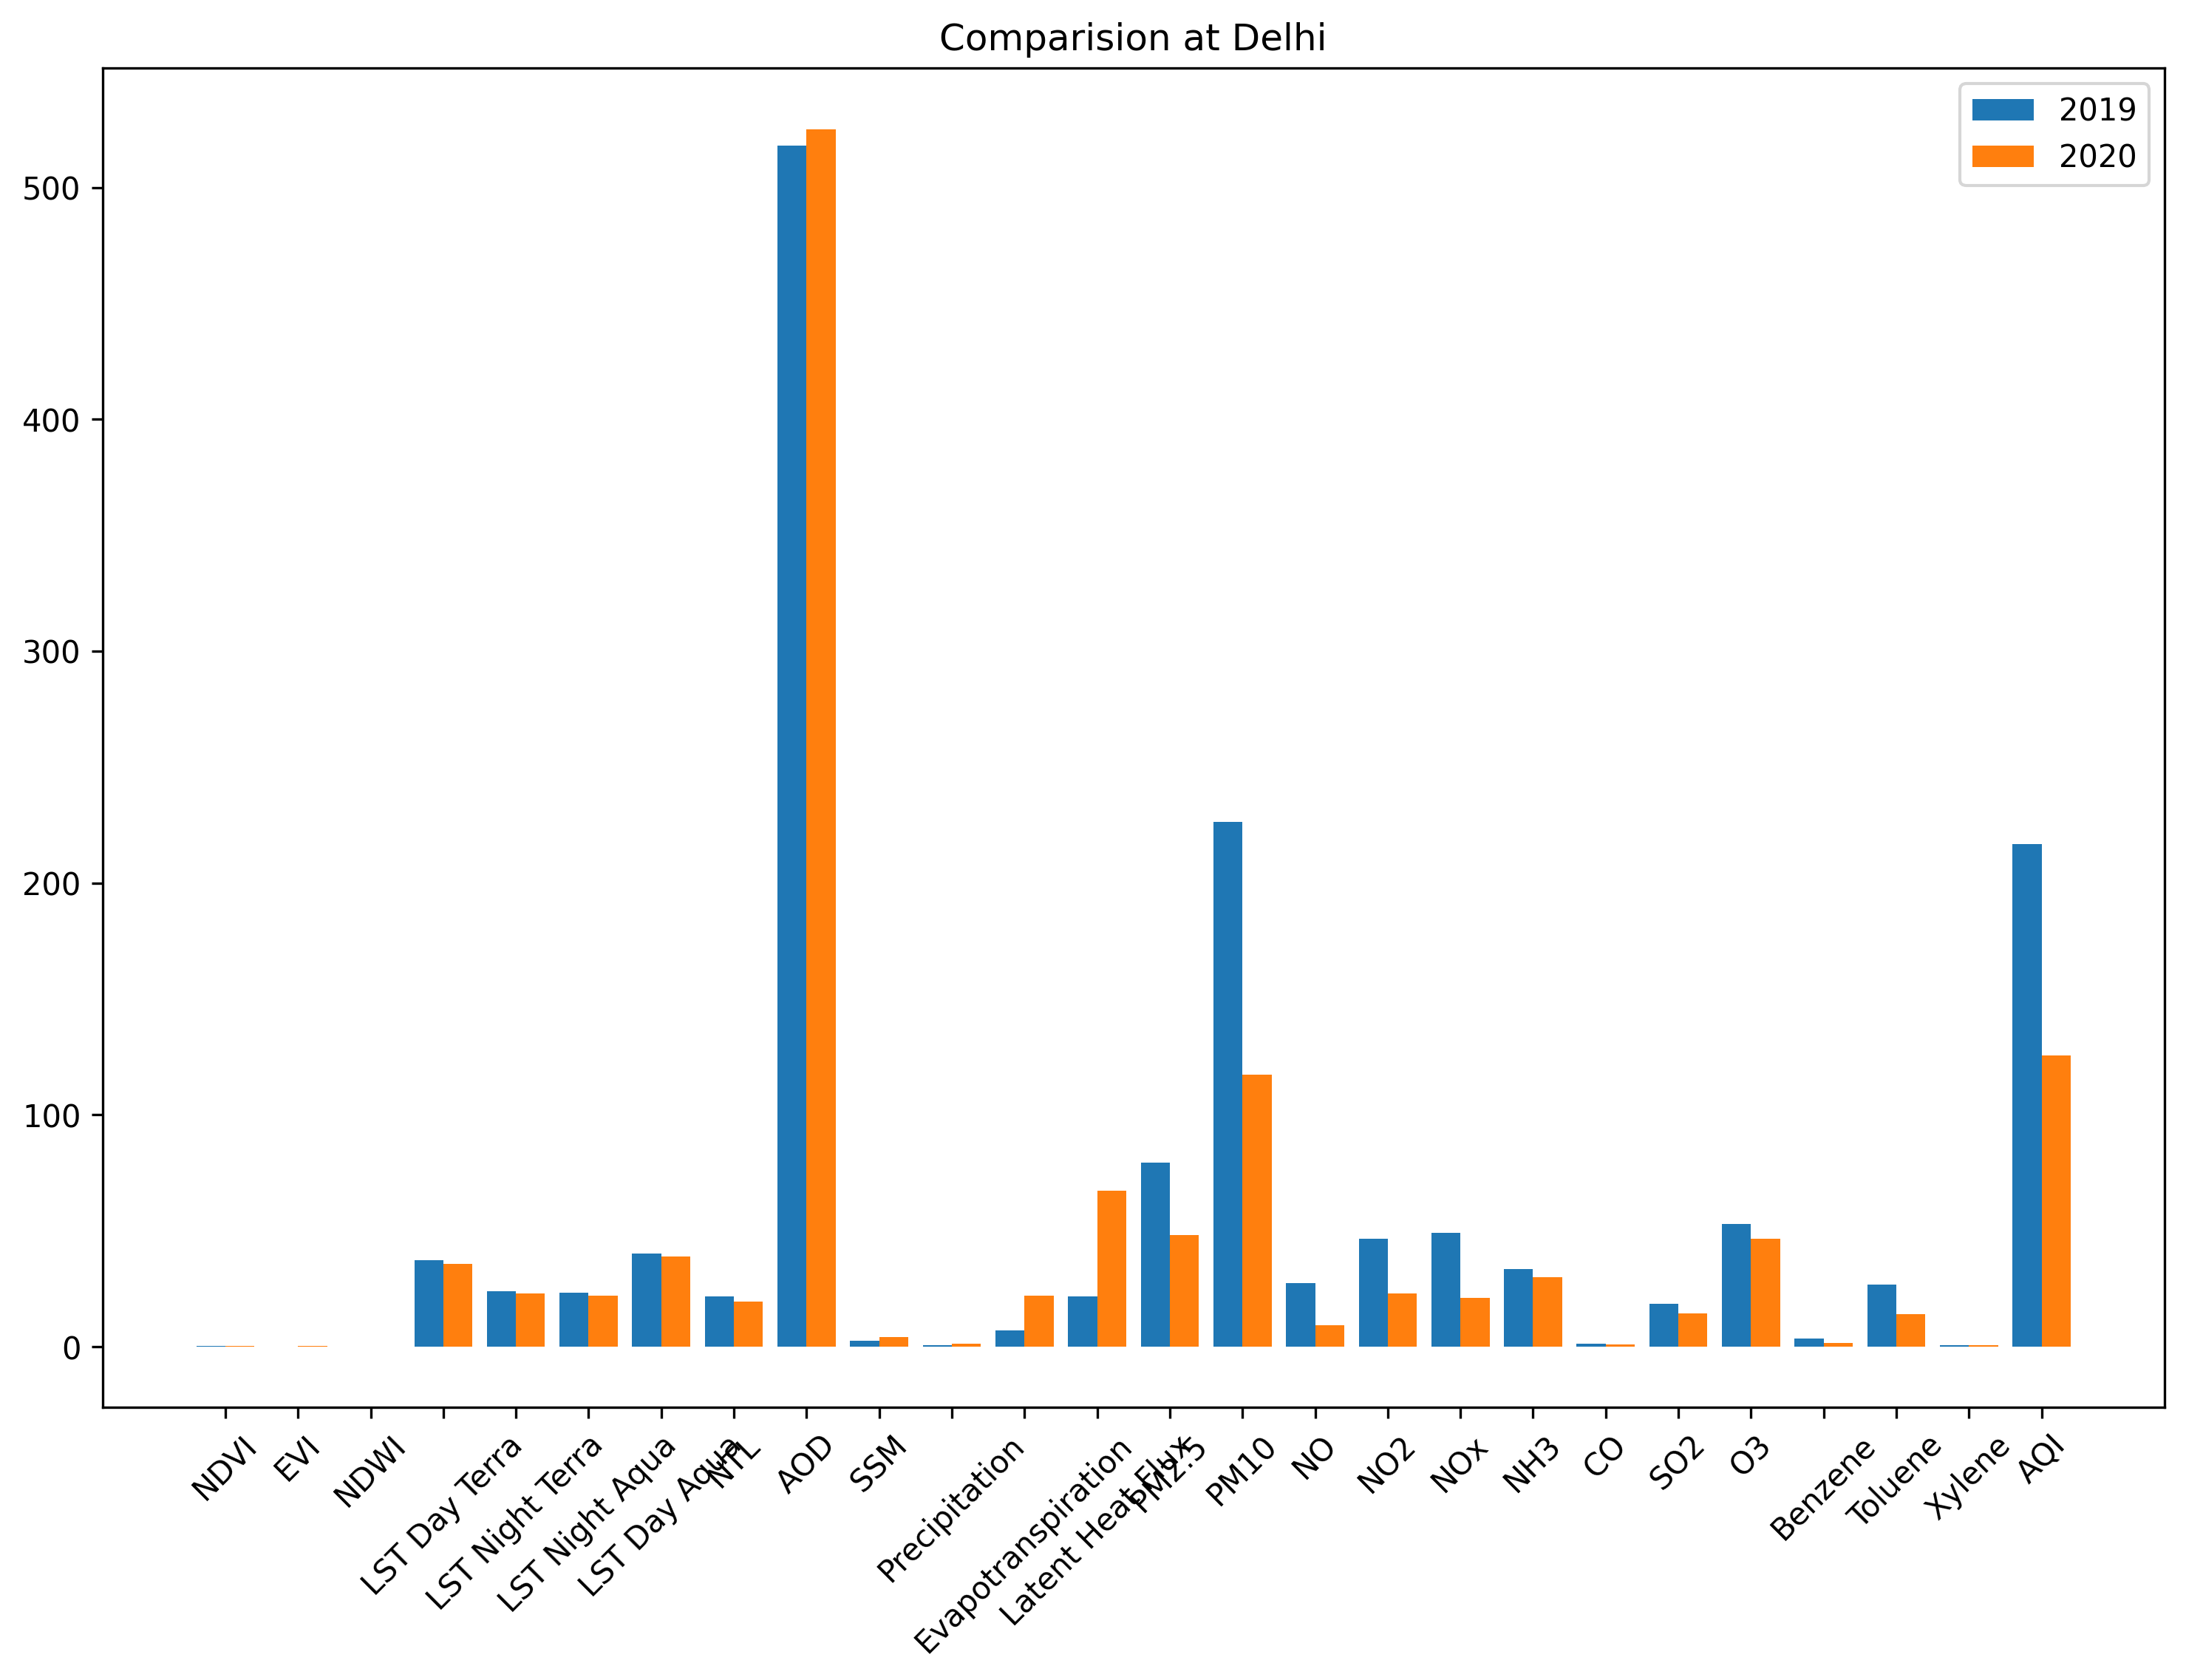

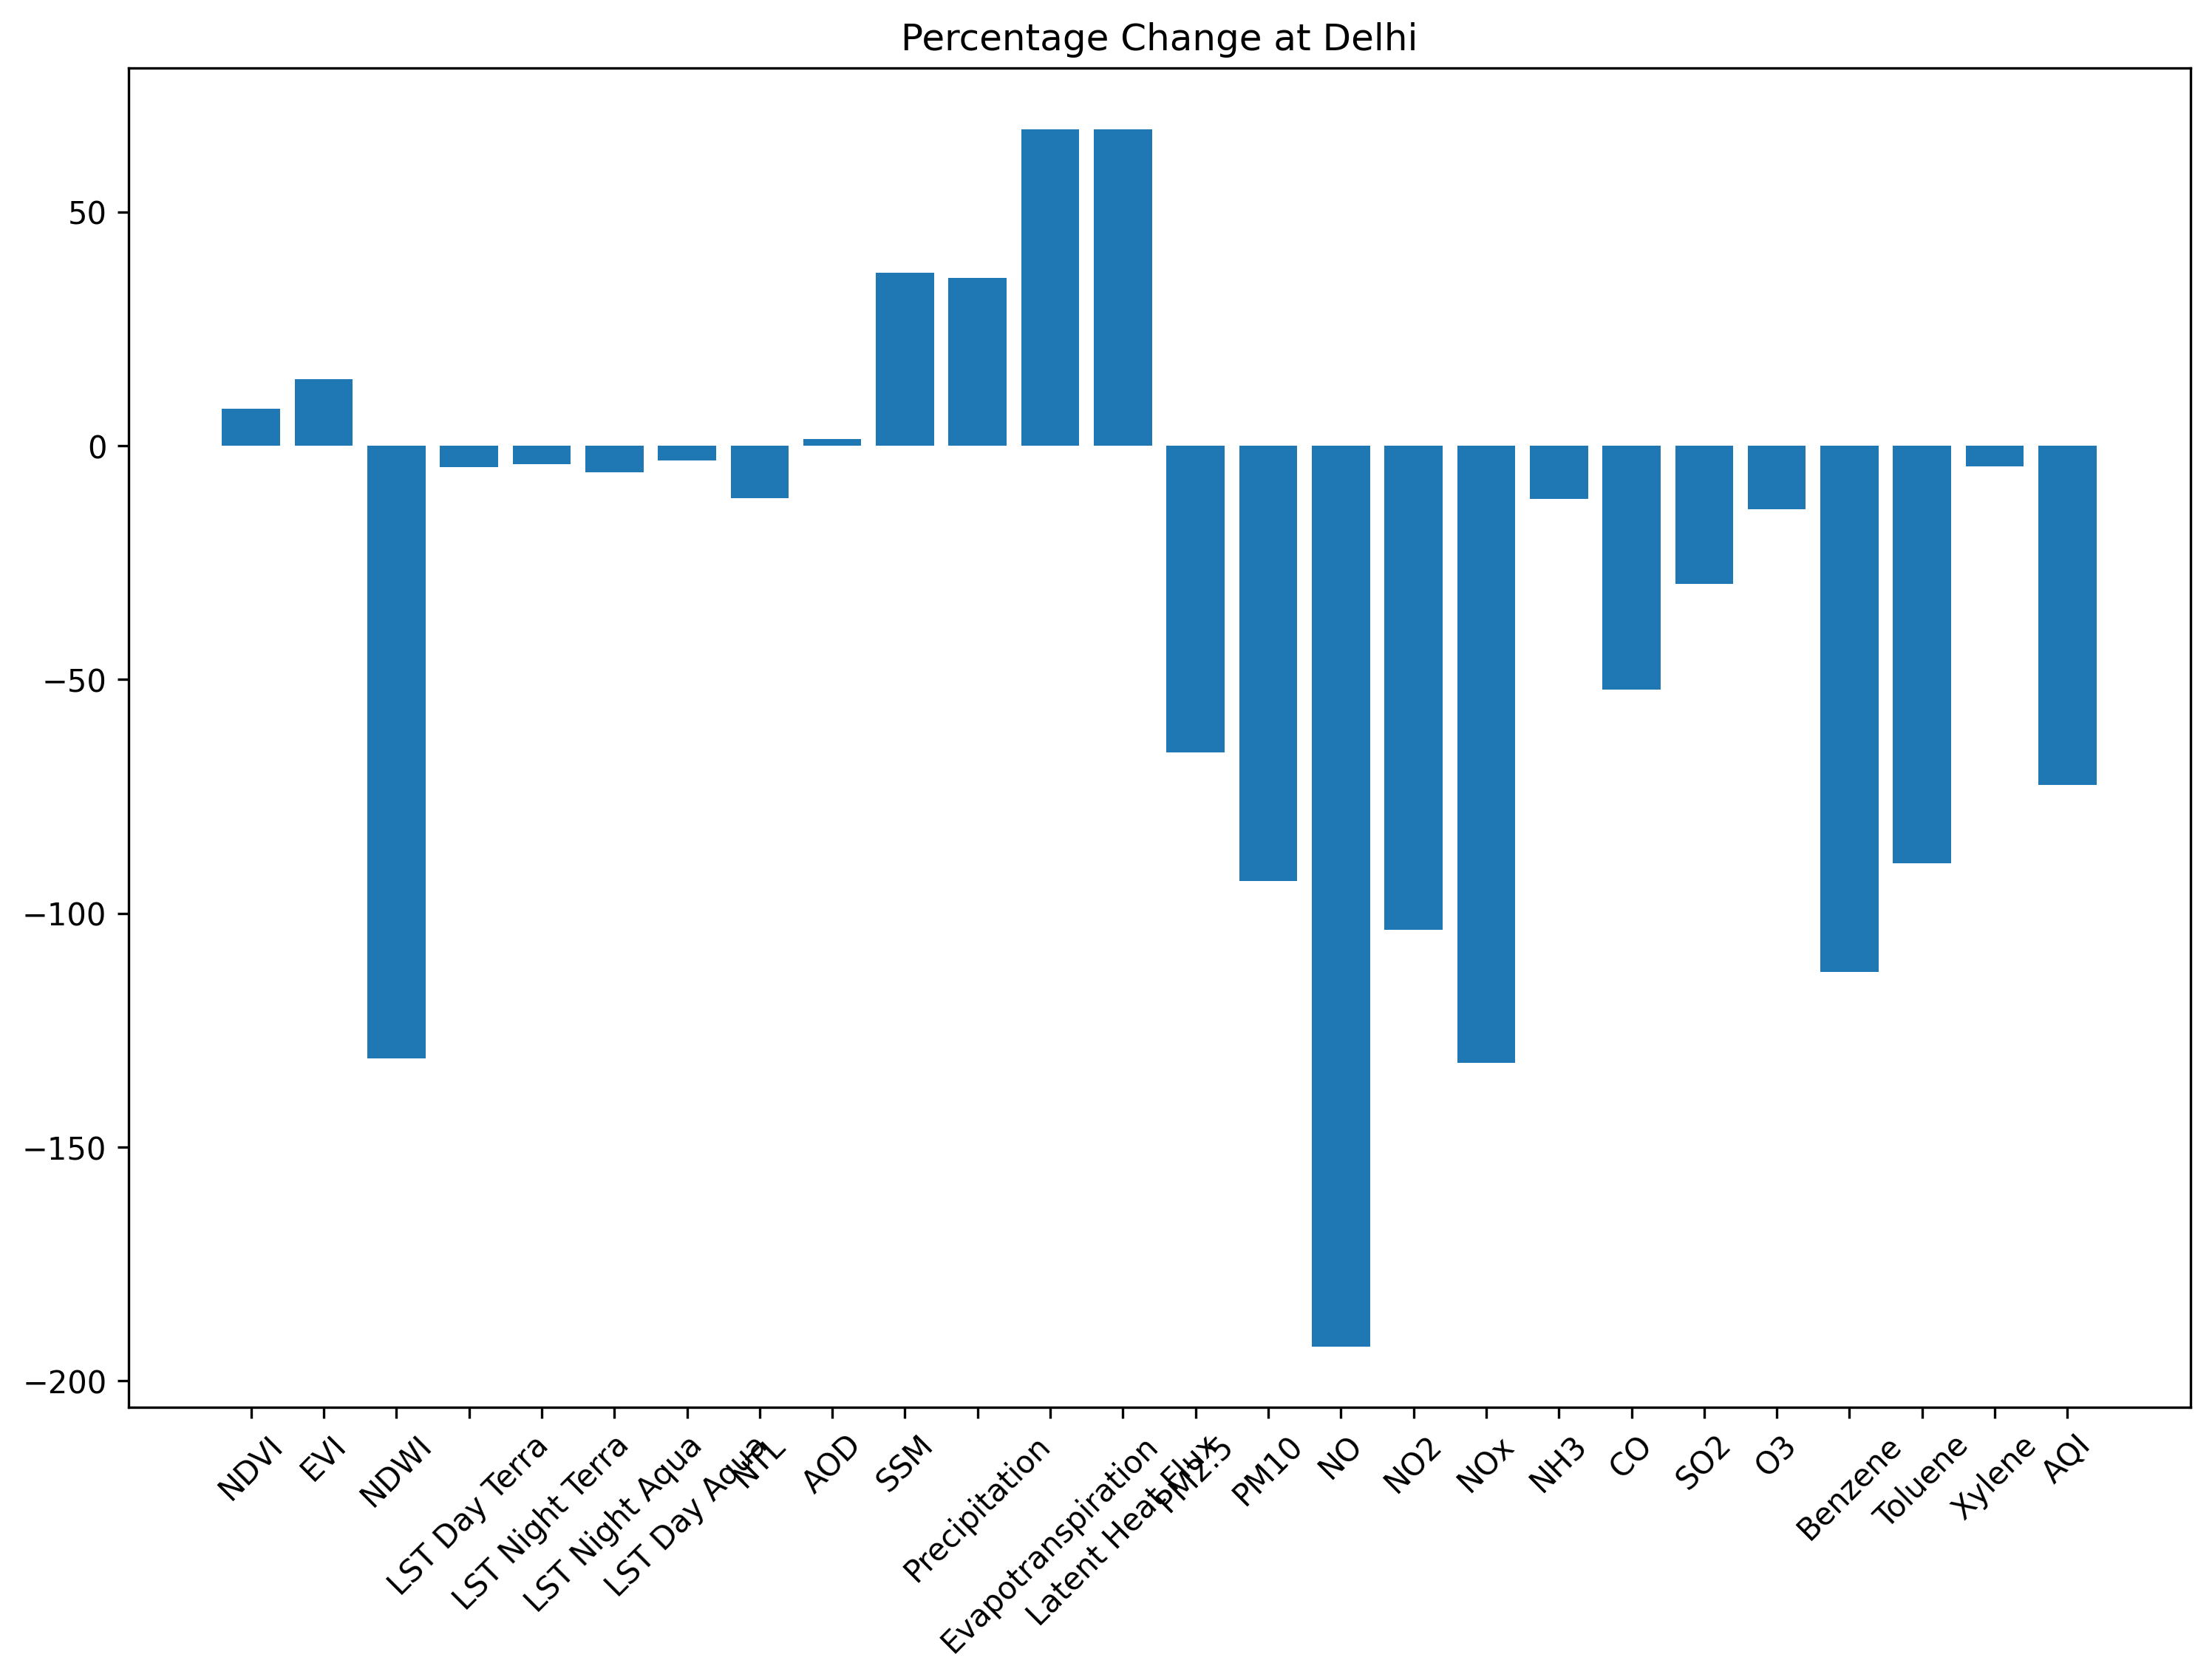

                        NDVI       EVI      NDWI  LST Day Terra  \
NDVI                1.000000  0.857912 -0.606611       0.122868   
EVI                 0.857912  1.000000 -0.511563      -0.100692   
NDWI               -0.606611 -0.511563  1.000000      -0.636021   
LST Day Terra       0.122868 -0.100692 -0.636021       1.000000   
LST Night Terra    -0.111537 -0.271206 -0.210642       0.512227   
LST Night Aqua     -0.091016 -0.130376 -0.381618       0.540020   
LST Day Aqua        0.090461  0.068453 -0.081448       0.259155   
NTL                 0.998933  0.996377  0.308592      -0.674267   
AOD                -0.502230 -0.347131  0.084678      -0.151462   
SSM                -0.155347  0.071197  0.454916      -0.624734   
Precipitation      -0.367293 -0.321403  0.361321      -0.087852   
Evapotranspiration  0.296304  0.732549  0.077413      -0.275813   
Latent Heat Flux    0.294844  0.734653  0.073607      -0.279614   
PM2.5               0.069544 -0.006195 -0.189076       0.00664

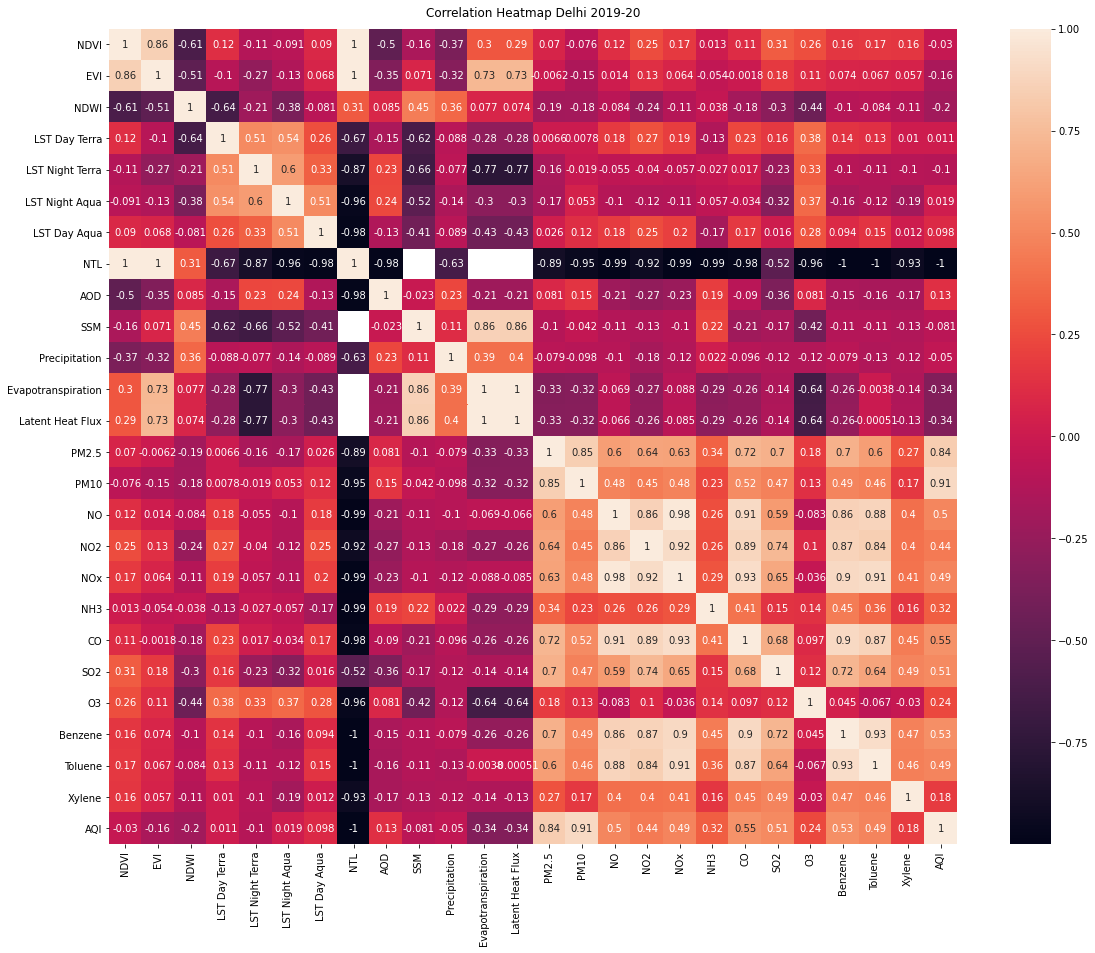

['NDVI', 'EVI', 'NDWI', 'LST Day Terra', 'LST Night Terra', 'LST Night Aqua', 'LST Day Aqua', 'NTL', 'AOD', 'SSM', 'Precipitation', 'Evapotranspiration', 'Latent Heat Flux', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


AttributeError: 'numpy.ndarray' object has no attribute 'legend'

<Figure size 1800x1080 with 0 Axes>

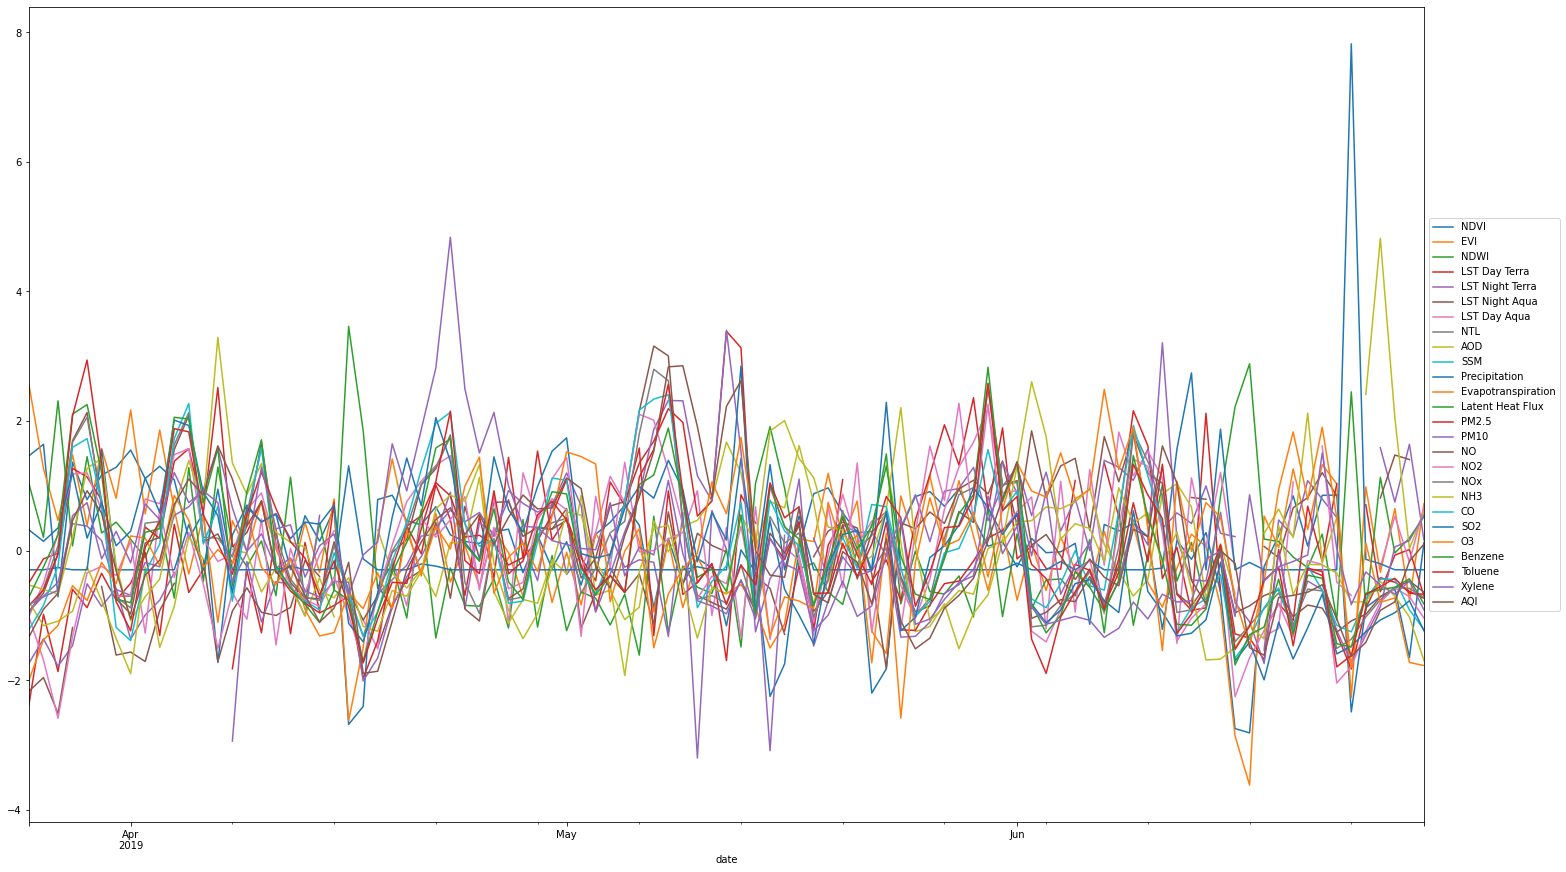

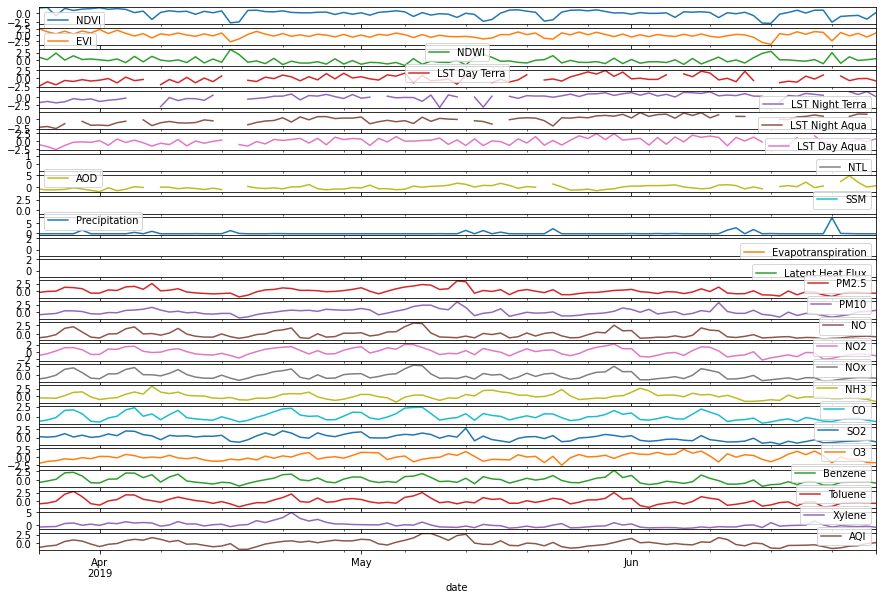

In [51]:
coll_ndvi_data()
coll_evi_data()
coll_ndwi_data()
coll_lst_day_terra_data()
coll_lst_night_terra_data()
coll_lst_day_aqua_data()
coll_lst_night_aqua_data()
coll_aod_data()
coll_ntl_data()
coll_ssm_data()
coll_et_data()
coll_lhe_data()
coll_ppt_data()
show_plots()
get_gee_map_data()

